## Student Performance Probability Analysis
In this section, we analyze the distribution of student performance data, focusing on:

#### Probability Density Function (PDF): 
    Represents the likelihood of a score occurring within a specific range.
#### Cumulative Distribution Function (CDF): 
    Shows the cumulative probability up to a given score.
#### Gaussian Distribution: 
    We’ll explore the Gaussian (normal) distribution, a fundamental concept in probability theory, to better understand the spread of scores.

#### Importing necessary libraries

In [57]:
import pandas as pd  # For reading CSV and data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
import scipy.stats as stats  # For probability plots and statistical analysis

#### Reading the dataset

In [84]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Plotting Histogram

<Figure size 1200x500 with 0 Axes>

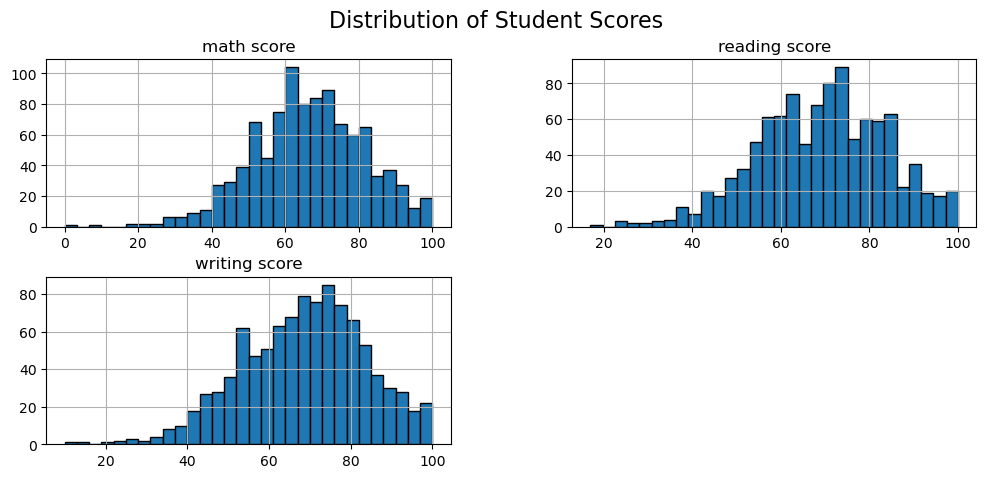

In [59]:
plt.figure(figsize=(12, 5))
df.hist(bins=30, edgecolor='black', figsize=(12, 5))
plt.suptitle('Distribution of Student Scores', fontsize=16)
plt.show()

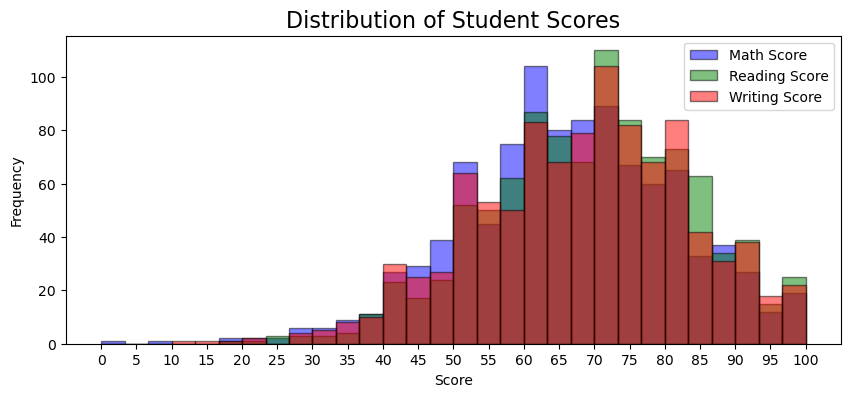

In [60]:
# Plotting on the same graph
df[['math score', 'reading score', 'writing score']].plot(
    kind='hist', bins=30, alpha=0.5, edgecolor='black', figsize=(10, 4), color=['blue', 'green', 'red']
)

plt.xticks(np.arange(0, 105, 5))  # Setting x-axis ticks at intervals of 5

plt.title('Distribution of Student Scores', fontsize=16)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(['Math Score', 'Reading Score', 'Writing Score'])
plt.show()

#### Plot PDF and CDF

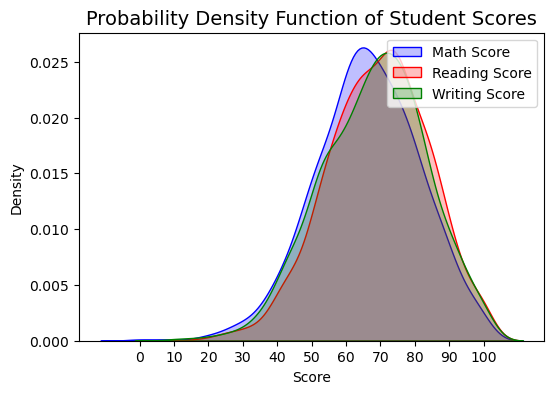

In [70]:
# PDF of all
plt.figure(figsize=(6, 4))
sns.kdeplot(df['math score'], fill=True, color='blue', label='Math Score')
sns.kdeplot(df['reading score'], fill=True, color='red', label='Reading Score')
sns.kdeplot(df['writing score'], fill=True, color='green', label='Writing Score')

plt.title('Probability Density Function of Student Scores', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

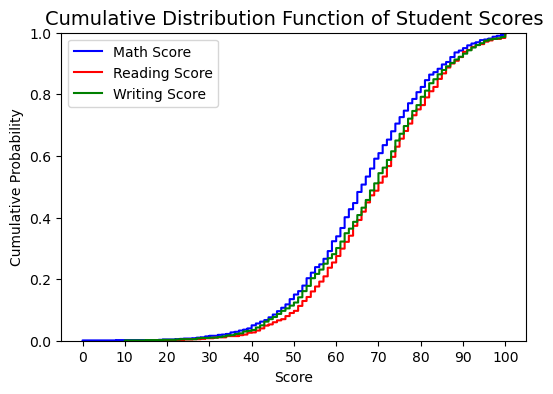

In [71]:
#CDF of All
plt.figure(figsize=(6, 4))
sns.ecdfplot(df['math score'], color='blue', label='Math Score')
sns.ecdfplot(df['reading score'], color='red', label='Reading Score')
sns.ecdfplot(df['writing score'], color='green', label='Writing Score')

plt.title('Cumulative Distribution Function of Student Scores', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Cumulative Probability')
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

##### let's take a single column
to get a better understanding, let us move forward with a single column of our choice

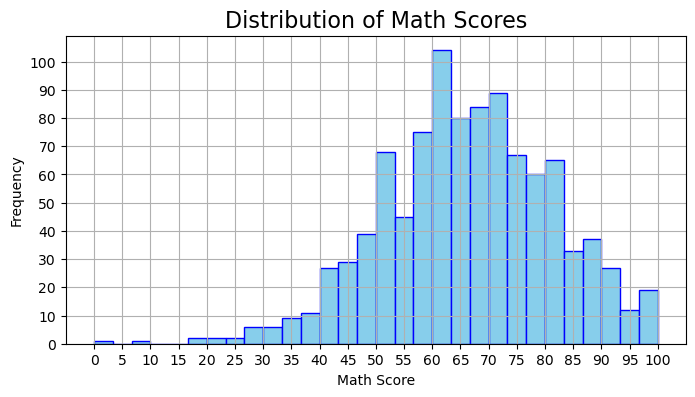

In [61]:
#let's take "math score" and plot it's histogram
plt.figure(figsize=(8, 4))
df['math score'].hist(bins=30, edgecolor='blue', color='skyblue')
plt.title('Distribution of Math Scores', fontsize=16)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 105, 5))  # Setting x-axis ticks at intervals of 5
plt.yticks(np.arange(0, 110, 10))  # Setting y-axis ticks at intervals of 10
plt.show()

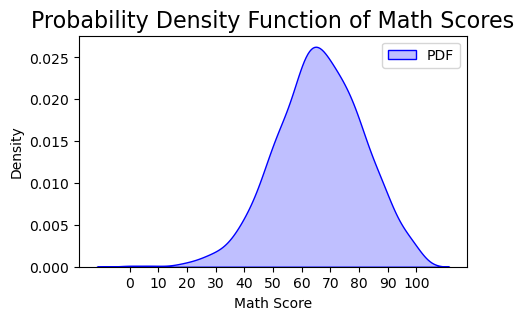

In [72]:
# Plot Probability Density Function (PDF)
plt.figure(figsize=(5, 3))
sns.kdeplot(df['math score'], fill=True, color='blue', label='PDF')  
plt.title('Probability Density Function of Math Scores', fontsize=16)
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

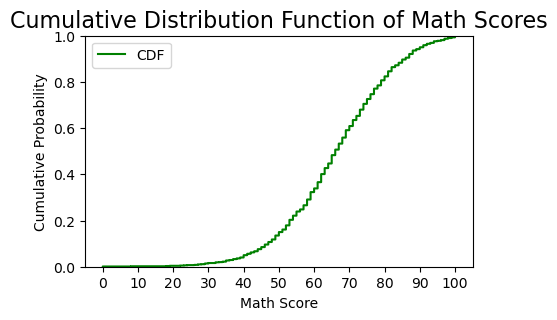

In [73]:
# Plot Cumulative Distribution Function (CDF)
plt.figure(figsize=(5, 3))
sns.ecdfplot(df['math score'], color='green', label='CDF')
plt.title('Cumulative Distribution Function of Math Scores', fontsize=16)
plt.xlabel('Math Score')
plt.ylabel('Cumulative Probability')
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.show()

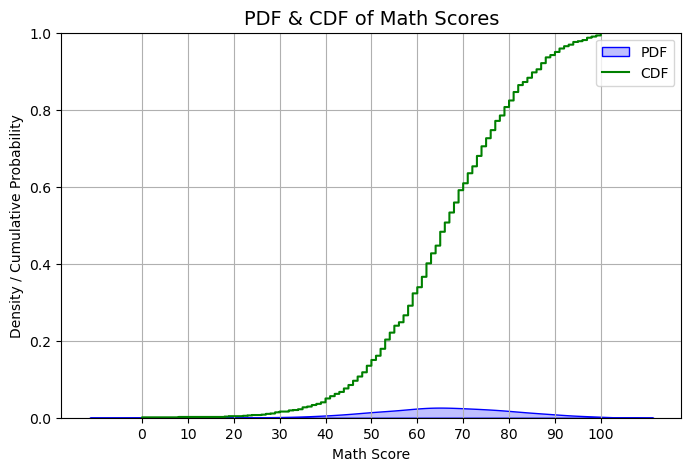

In [75]:
# Plot PDF and CDF on the same graph
plt.figure(figsize=(8, 5))
sns.kdeplot(df['math score'], fill=True, color='blue', label='PDF')# PDF (Probability Density Function)
sns.ecdfplot(df['math score'], color='green', label='CDF')# CDF (Cumulative Distribution Function)

plt.title('PDF & CDF of Math Scores', fontsize=14)
plt.xlabel('Math Score')
plt.ylabel('Density / Cumulative Probability')
plt.xticks(np.arange(0, 110, 10))
plt.legend()
plt.grid(True)
plt.show()

## Gaussian (Normal) Distribution

Now, we will analyze the **Math Scores** using the **Gaussian (Normal) Distribution**.  
A **Gaussian distribution** is a **bell-shaped curve** that represents how data is distributed around the mean.  

### Formula for Gaussian Distribution:  

![Alt Text](gaussian.png)


This formula helps us understand how **likely** a value is in a normally distributed dataset.  
Let’s now **plot the Gaussian curve** for our **Math Scores**!  


Mean: 66.089, Standard Deviation: 15.163080096009468


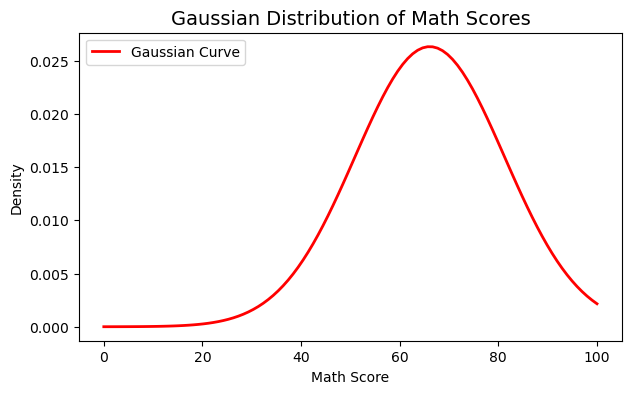

In [87]:
# Calculate mean and standard deviation
mean_math = df['math score'].mean()
std_math = df['math score'].std()
print(f"Mean: {mean_math}, Standard Deviation: {std_math}")

# Generate x values for Gaussian curve
x = np.linspace(df['math score'].min(), df['math score'].max(), 100)

# Compute Gaussian distribution
gaussian = (1 / (std_math * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_math) / std_math) ** 2)
plt.figure(figsize=(7, 4))
plt.plot(x, gaussian, color='red', linewidth=2, label='Gaussian Curve')
plt.title('Gaussian Distribution of Math Scores', fontsize=14)
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.legend()
plt.show()


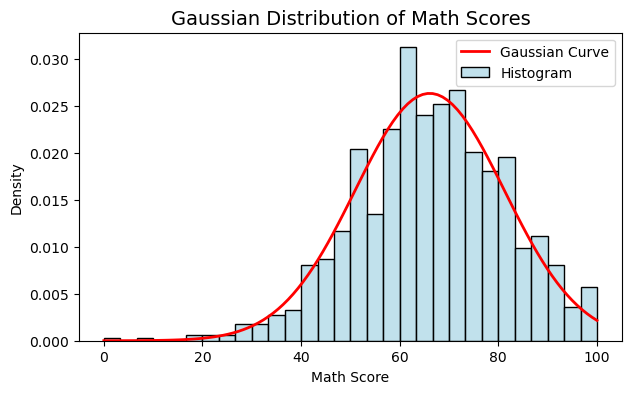

In [80]:
#gaussian with Histogram
plt.figure(figsize=(7, 4))
sns.histplot(df['math score'], 
             bins=30, kde=False, color='lightblue', stat='density', edgecolor='black', label='Histogram')
plt.plot(x, gaussian, color='red', linewidth=2, label='Gaussian Curve')
plt.title('Gaussian Distribution of Math Scores', fontsize=14)
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.legend()
plt.show()

## Interactivity

In [88]:
import ipywidgets as widgets
from ipywidgets import interact

def plot_gaussian(mean=0, std=0):
    x = np.linspace(0, 100, 1000)
    y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=f"Mean: {mean}, Std Dev: {std}", color="blue")
    plt.title("Gaussian Distribution")
    plt.xlabel("Math Score")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

interact(plot_gaussian, mean=(0, 100, 5), std=(5, 30, 1))

interactive(children=(IntSlider(value=0, description='mean', step=5), IntSlider(value=5, description='std', ma…

<function __main__.plot_gaussian(mean=0, std=0)>